In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

## 1.  Read the data as an appropriate Time Series data and plot the data.

In [2]:
df = pd.read_csv('Sparkling.csv')

In [3]:
df.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [4]:
date = pd.date_range(start='1/1/1980', periods=len(df), freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [5]:
df['Time_Stamp'] = date
df.head()

,YearMonth,Sparkling,Time_Stamp
0,1980-01,1686,1980-01-31
1,1980-02,1591,1980-02-29
2,1980-03,2304,1980-03-31
3,1980-04,1712,1980-04-30
4,1980-05,1471,1980-05-31


In [6]:
df.set_index(keys='Time_Stamp',drop=True,inplace=True)
df.head()

,YearMonth,Sparkling
Time_Stamp,,
1980-01-31,1980-01,1686
1980-02-29,1980-02,1591
1980-03-31,1980-03,2304
1980-04-30,1980-04,1712
1980-05-31,1980-05,1471


In [7]:
df.drop(labels=['YearMonth'],axis=1,inplace=True)
df.head()

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


In [8]:
df.tail()

,Sparkling
Time_Stamp,
1995-03-31,1897
1995-04-30,1862
1995-05-31,1670
1995-06-30,1688
1995-07-31,2031


##  Plot the Time Series data.

In [9]:

from pylab import rcParams

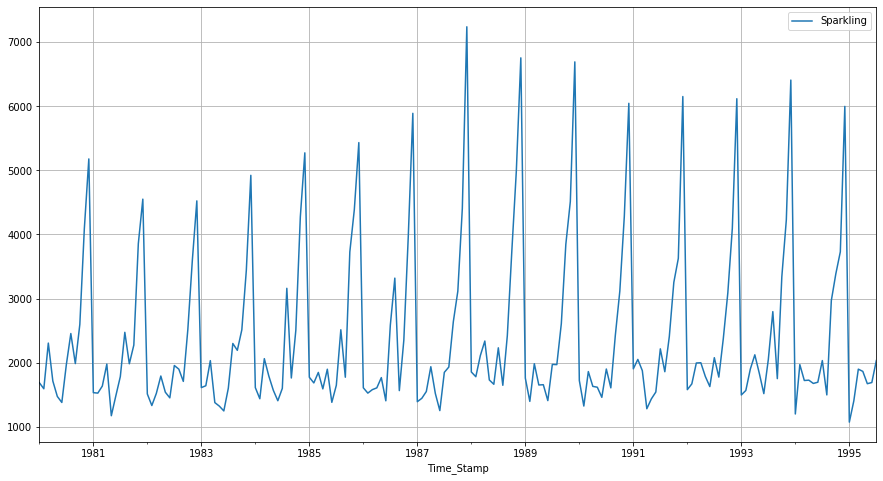

In [10]:
rcParams['figure.figsize'] = 15,8

df.plot()
plt.grid();

## 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [11]:
df.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


### Checking for Missing Values

In [12]:
df.isnull().sum()

Sparkling    0
dtype: int64

### Plot the Time series along with the mean and median of the Time series in the graph to get an understanding of the fluctuation of the data from these two measures of central tendency.

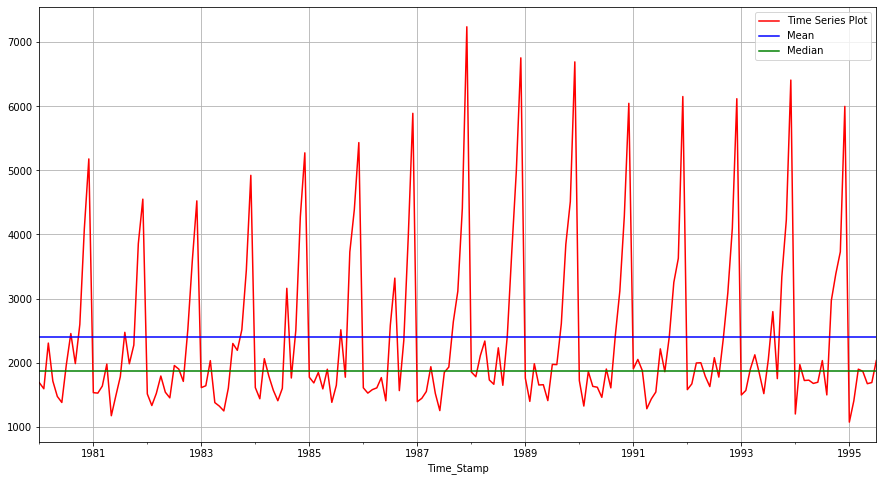

In [13]:
df.plot(color='Red')
plt.axhline(df['Sparkling'].mean(),color='Blue')
plt.axhline(df['Sparkling'].median(),color='Green')
plt.grid()
plt.legend(['Time Series Plot','Mean','Median']);

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


## Plot a quarterly comparison  using a barplot.

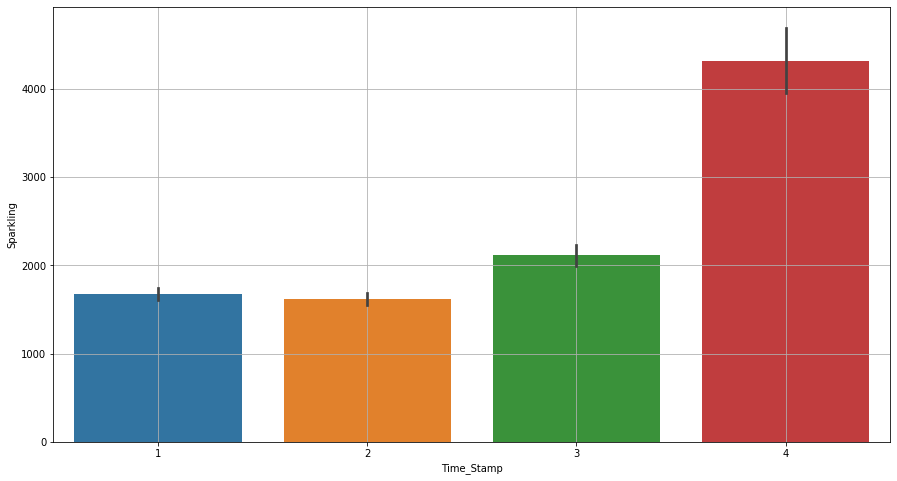

In [15]:
sns.barplot(df.index.quarter,df.Sparkling,data=df)
plt.grid();

## 5. Plot the year on year quarterly comparison

In [16]:
df.index.month_name

<bound method PandasDelegate._add_delegate_accessors.<locals>._create_delegator_method.<locals>.f of DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', name='Time_Stamp', length=187, freq=None)>

### Month wise data in Pivot table

In [17]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month_name(), index = df.index.year)
monthly_sales_across_years

Time_Stamp,April,August,December,February,January,July,June,March,May,November,October,September
Time_Stamp,,,,,,,,,,,,
1980,1712.0,2453.0,5179.0,1591.0,1686.0,1966.0,1377.0,2304.0,1471.0,4087.0,2596.0,1984.0
1981,1976.0,2472.0,4551.0,1523.0,1530.0,1781.0,1480.0,1633.0,1170.0,3857.0,2273.0,1981.0
1982,1790.0,1897.0,4524.0,1329.0,1510.0,1954.0,1449.0,1518.0,1537.0,3593.0,2514.0,1706.0
1983,1375.0,2298.0,4923.0,1638.0,1609.0,1600.0,1245.0,2030.0,1320.0,3440.0,2511.0,2191.0
1984,1789.0,3159.0,5274.0,1435.0,1609.0,1597.0,1404.0,2061.0,1567.0,4273.0,2504.0,1759.0
1985,1589.0,2512.0,5434.0,1682.0,1771.0,1645.0,1379.0,1846.0,1896.0,4388.0,3727.0,1771.0
1986,1605.0,3318.0,5891.0,1523.0,1606.0,2584.0,1403.0,1577.0,1765.0,3987.0,2349.0,1562.0
1987,1935.0,1930.0,7242.0,1442.0,1389.0,1847.0,1250.0,1548.0,1518.0,4405.0,3114.0,2638.0
1988,2336.0,1645.0,6757.0,1779.0,1853.0,2230.0,1661.0,2108.0,1728.0,4988.0,3740.0,2421.0


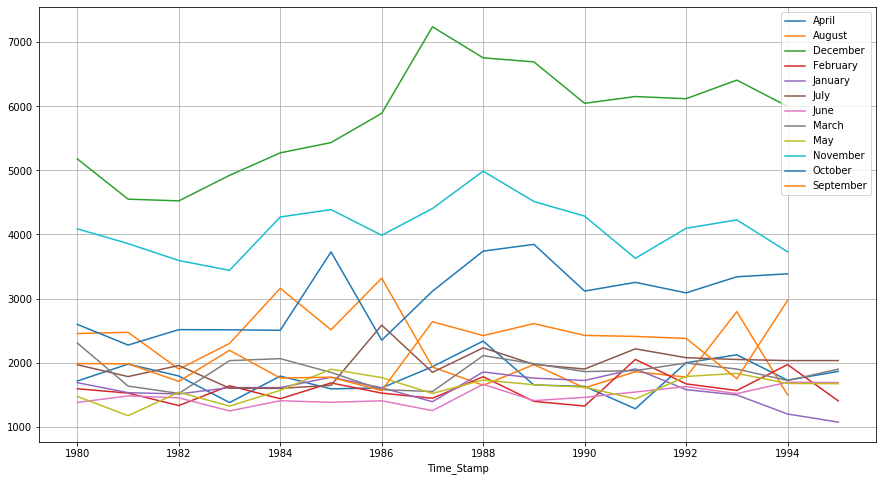

In [18]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

## Plot the distribution plot for quarterly comparison

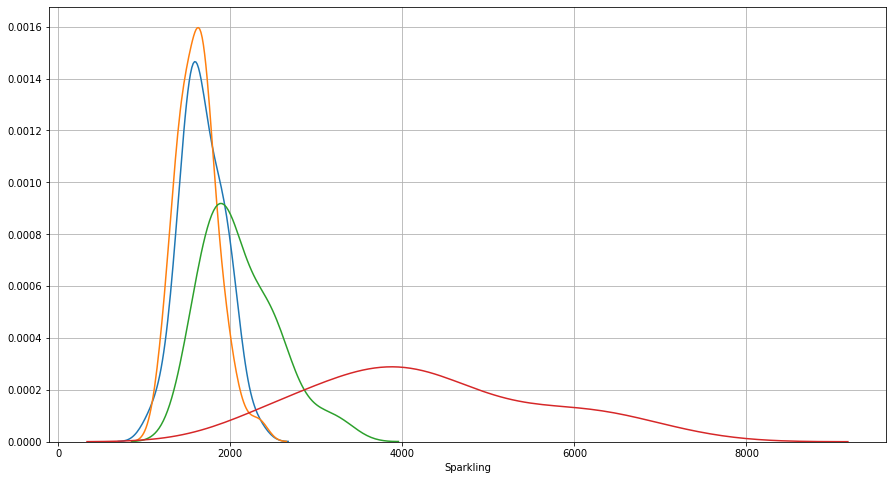

In [19]:
sns.distplot(df.loc[df.index.quarter == 1]['Sparkling'],hist=False)
sns.distplot(df.loc[df.index.quarter == 2]['Sparkling'],hist=False)
sns.distplot(df.loc[df.index.quarter == 3]['Sparkling'],hist=False)
sns.distplot(df.loc[df.index.quarter == 4]['Sparkling'],hist=False)
plt.grid();

## Plot a graph of monthly Sales across years

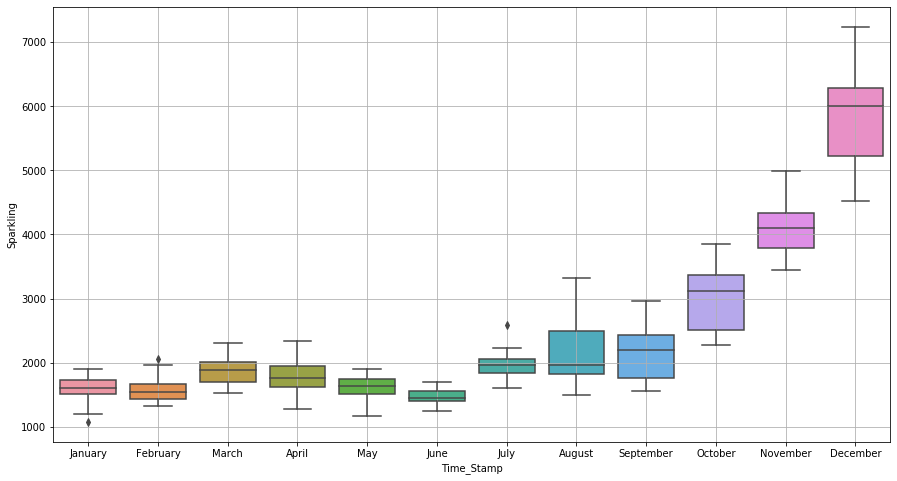

In [20]:
sns.boxplot(x = df.index.month_name(),y = df['Sparkling'])
plt.grid();

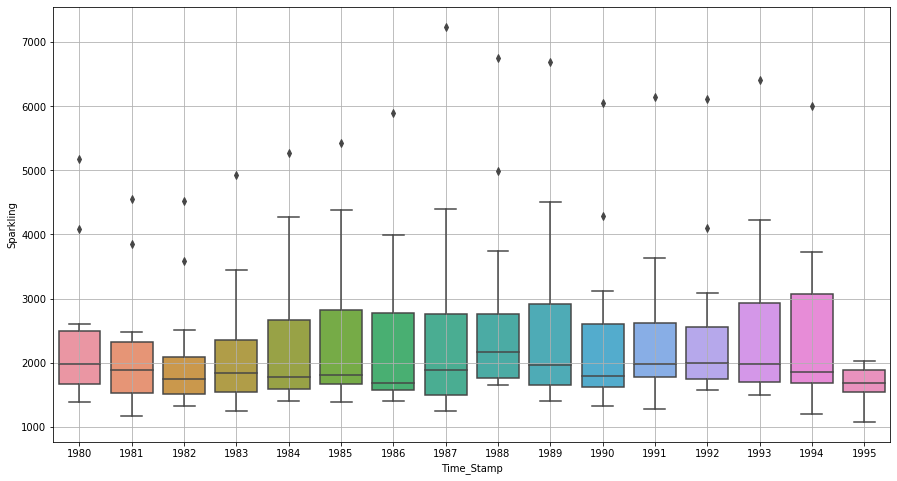

In [21]:
sns.boxplot(x = df.index.year,y = df['Sparkling'])
plt.grid();

**There are outliers in the sale of Sparkling wine over the years and it occurred more frequently  in the months of January February and July.**

## Decompose the data and check the trend, seasonality and the irregular/residual/error component

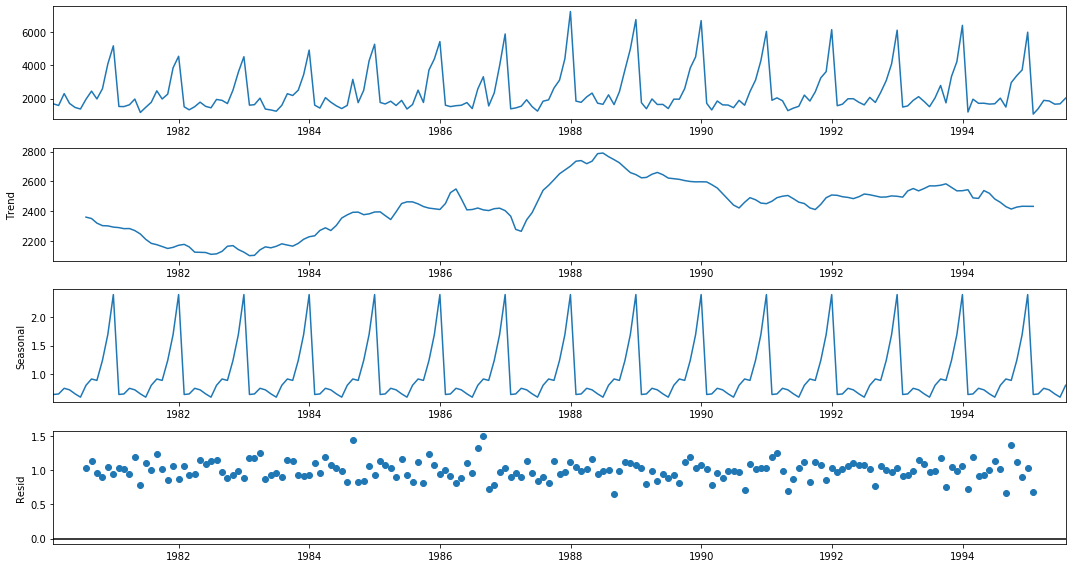

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

In [23]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(7),'\n')
print('Seasonality','\n',seasonality.head(7),'\n')
print('Residual','\n',residual.head(7),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31        NaN
1980-02-29        NaN
1980-03-31        NaN
1980-04-30        NaN
1980-05-31        NaN
1980-06-30        NaN
1980-07-31    1.02923
Name: resid, dtype: float64 



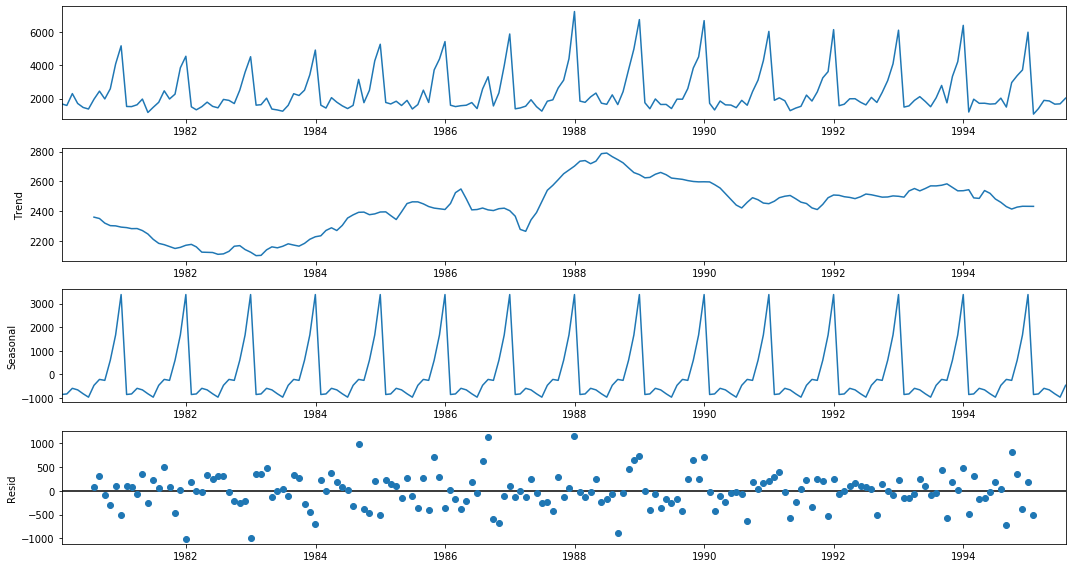

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df,model='addictive')
decomposition.plot();



In [25]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(7),'\n')
print('Seasonality','\n',seasonality.head(7),'\n')
print('Residual','\n',residual.head(7),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31   -854.260599
1980-02-29   -830.350678
1980-03-31   -592.356630
1980-04-30   -658.490559
1980-05-31   -824.416154
1980-06-30   -967.434011
1980-07-31   -465.502265
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31    70.835599
Name: resid, dtype: float64 



**Since both the Multiplicative and Addictive model have give same plot and values we can take Addictive model to decompose the dataset.**

## Plot the Empirical Cumulative Distribution.

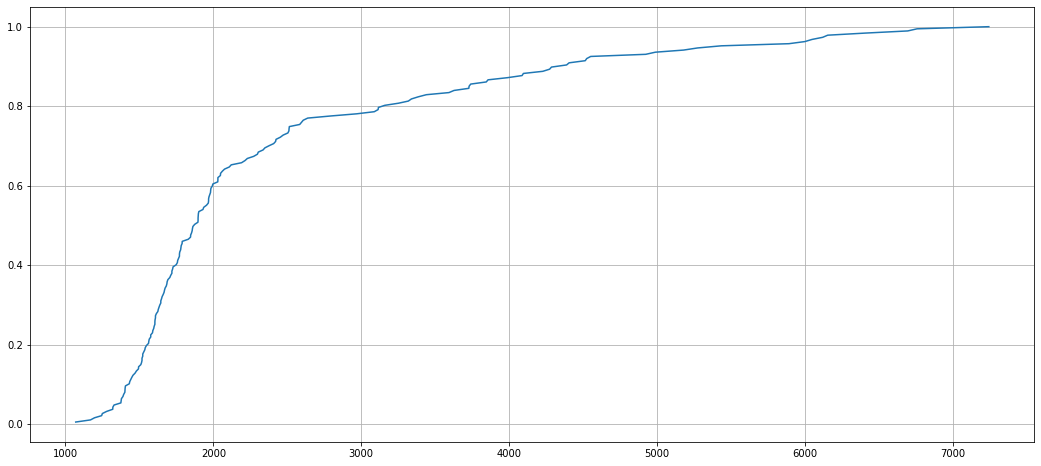

In [26]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('');

## Plot the average Sales per month and the month on month percentage change of Sales.

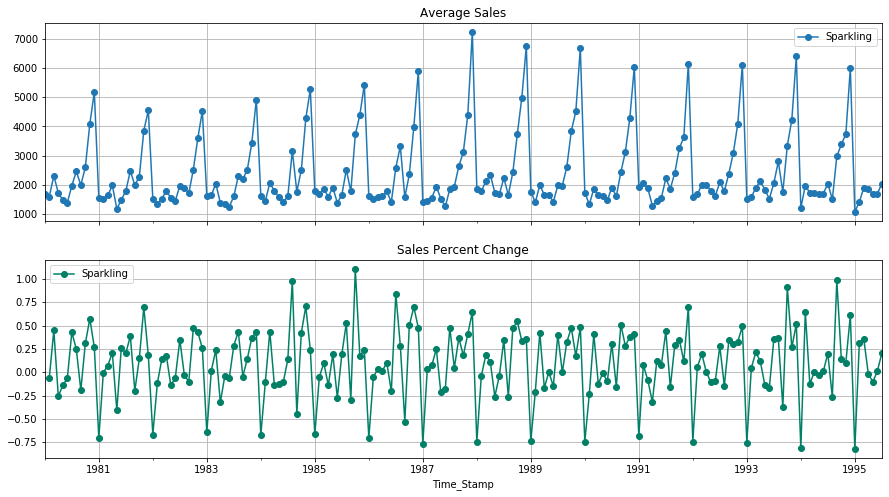

In [27]:
# group by date and get average RetailSales, and precent change
average    = df.groupby(df.index)["Sparkling"].mean()
pct_change = df.groupby(df.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sales Percent Change",grid=True)

## 3. Split the data into training and test. The test data should start in 1991.

In [28]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]


In [29]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [30]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


Last few rows of Training Data


,Sparkling
Time_Stamp,
1990-08-31,1605
1990-09-30,2424
1990-10-31,3116
1990-11-30,4286
1990-12-31,6047


First few rows of Test Data


,Sparkling
Time_Stamp,
1991-01-31,1902
1991-02-28,2049
1991-03-31,1874
1991-04-30,1279
1991-05-31,1432


Last few rows of Test Data


,Sparkling
Time_Stamp,
1995-03-31,1897
1995-04-30,1862
1995-05-31,1670
1995-06-30,1688
1995-07-31,2031


## 4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE.

## Building different models and comparing the accuracy metrics.
## Model 1: Linear Regression

**For this particular linear regression, we are going to regress the 'Sparkling' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.**

In [31]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [32]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [33]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1991-01-31       1902    43
1991-02-28       2049    44
1991-03-31       1874    45
1991-04-30       1279    46
1991-05-31       1432    47 

Last few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1995-03-31       1897    93
1995-04-30       1862    94
1995-05-31       1670    95
1995-06-30       1688    96
1995-07-31       2031    97 



Now that our training and test data has been modified, let us go ahead use 𝐿𝑖𝑛𝑒𝑎𝑟𝑅𝑒𝑔𝑟𝑒𝑠𝑠𝑖𝑜𝑛⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯ to build the model on the training data and test the model on the test data.

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lr = LinearRegression()

In [36]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

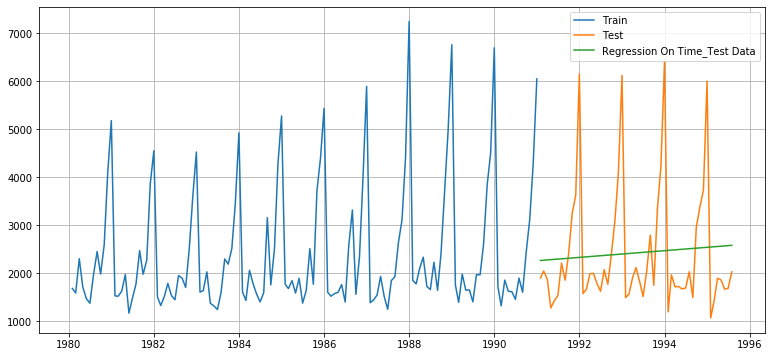

In [37]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

## Defining the accuracy metrics.

In [38]:
from sklearn import metrics

In [39]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1275.867


In [40]:
resultsDf = pd.DataFrame({'RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,RMSE
RegressionOnTime,1275.867052


## Model 2: Naive Approach: 𝑦̂ 𝑡+1=𝑦𝑡

**For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.**

In [41]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [42]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

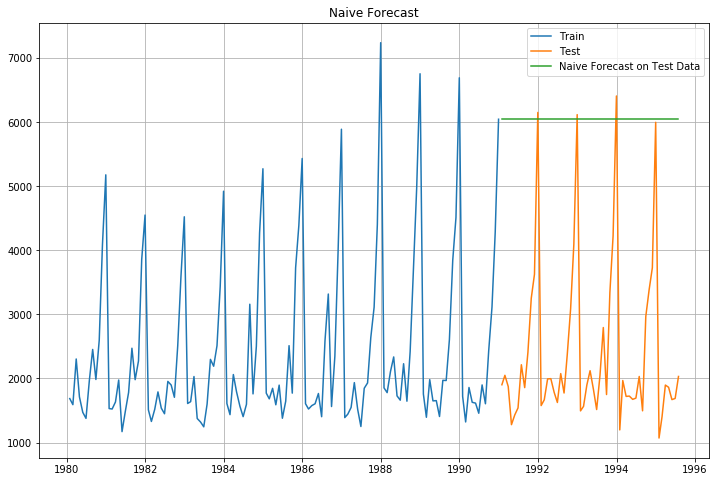

In [43]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

### Model Evaluation

In [44]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279


In [45]:
resultsDf_2 = pd.DataFrame({'RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,RMSE
RegressionOnTime,1275.867052
NaiveModel,3864.279352


## Method 3: Simple Average

**For this particular simple average method, we will forecast by using the average of the training values.**

In [46]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [47]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

,Sparkling,mean_forecast
Time_Stamp,,
1991-01-31,1902,2403.780303
1991-02-28,2049,2403.780303
1991-03-31,1874,2403.780303
1991-04-30,1279,2403.780303
1991-05-31,1432,2403.780303


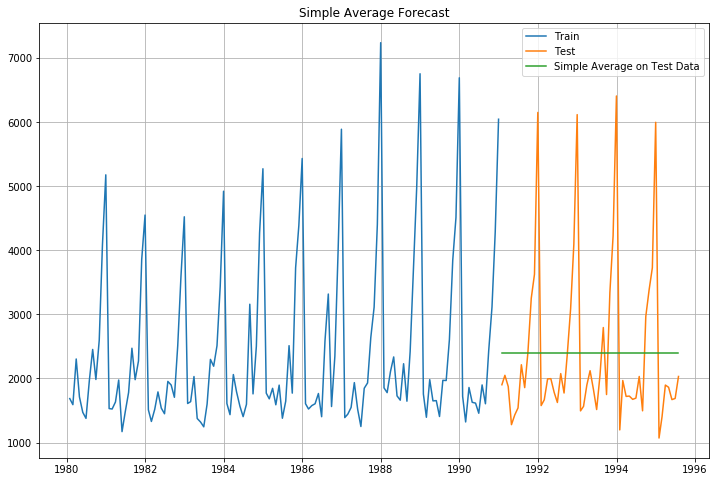

In [48]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

### Model Evaluation

In [49]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [50]:
resultsDf_3 = pd.DataFrame({'RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,RMSE
RegressionOnTime,1275.867052
NaiveModel,3864.279352
SimpleAverageModel,1275.081804


## Method 4: Moving Average(MA)

#### For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

###### For Moving Average, we are going to average over the entire data.

In [51]:
MovingAverage = df.copy()
MovingAverage.head()

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


#### Trailing moving averages

In [52]:

MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1980-01-31,1686,NaN,NaN,NaN,NaN
1980-02-29,1591,1638.5,NaN,NaN,NaN
1980-03-31,2304,1947.5,NaN,NaN,NaN
1980-04-30,1712,2008.0,1823.25,NaN,NaN
1980-05-31,1471,1591.5,1769.50,NaN,NaN


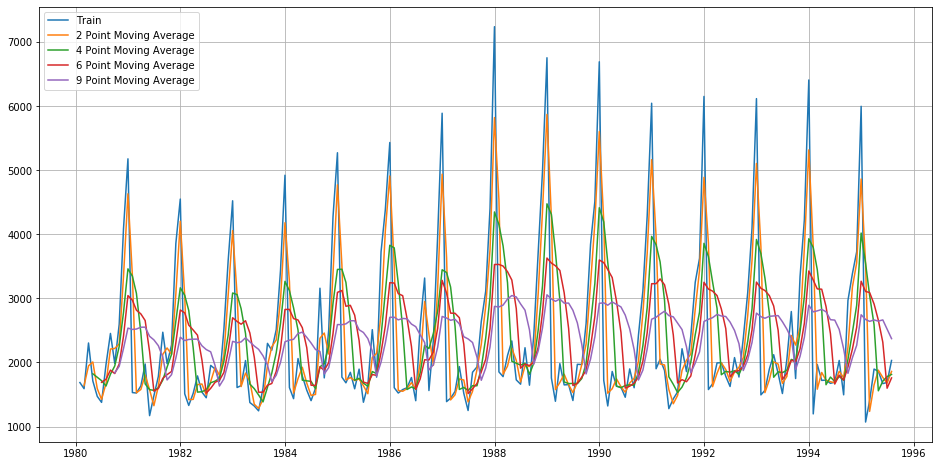

In [53]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

**Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.**

In [54]:
#Creating train and test set 
trailing_MovingAverage_train=df[df.index.year < 1991]
trailing_MovingAverage_test=df[df.index.year >= 1991]
print('Train Data set\n',trailing_MovingAverage_train.head())
print('Test Dataset\n',trailing_MovingAverage_test.head())


Train Data set
             Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471
Test Dataset
             Sparkling
Time_Stamp           
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432


In [55]:

trailing_MovingAverage_test['Trailing_2'] = trailing_MovingAverage_test['Sparkling'].rolling(2).mean()
trailing_MovingAverage_test['Trailing_4'] = trailing_MovingAverage_test['Sparkling'].rolling(4).mean()
trailing_MovingAverage_test['Trailing_6'] = trailing_MovingAverage_test['Sparkling'].rolling(6).mean()
trailing_MovingAverage_test['Trailing_9'] = trailing_MovingAverage_test['Sparkling'].rolling(9).mean()


trailing_MovingAverage_train['Trailing_2'] = trailing_MovingAverage_train['Sparkling'].rolling(2).mean()
trailing_MovingAverage_train['Trailing_4'] = trailing_MovingAverage_train['Sparkling'].rolling(4).mean()
trailing_MovingAverage_train['Trailing_6'] = trailing_MovingAverage_train['Sparkling'].rolling(6).mean()
trailing_MovingAverage_train['Trailing_9'] = trailing_MovingAverage_train['Sparkling'].rolling(9).mean()
trailing_MovingAverage_test.head()

C:\Users\Pc\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Pc\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Pc\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1991-01-31,1902,NaN,NaN,NaN,NaN
1991-02-28,2049,1975.5,NaN,NaN,NaN
1991-03-31,1874,1961.5,NaN,NaN,NaN
1991-04-30,1279,1576.5,1776.0,NaN,NaN
1991-05-31,1432,1355.5,1658.5,NaN,NaN


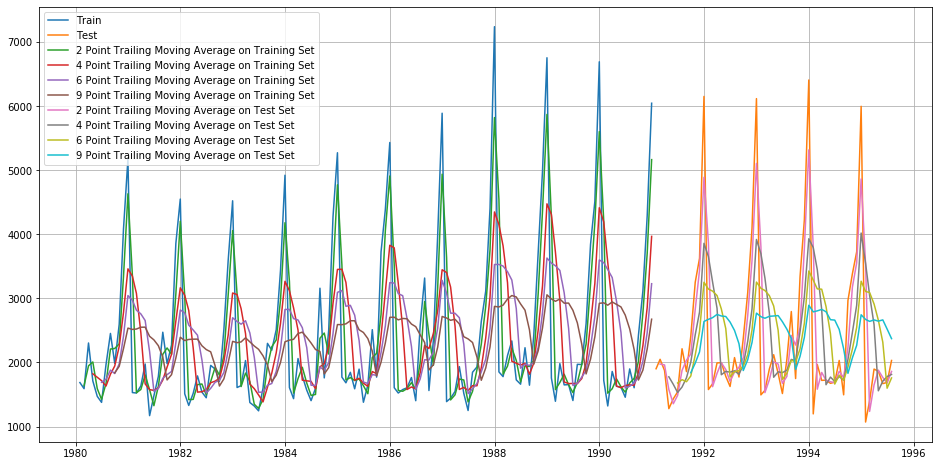

In [56]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train["Sparkling"], label='Train')
plt.plot(trailing_MovingAverage_test["Sparkling"] ,label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [57]:
trailing_MovingAverage_test = trailing_MovingAverage_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

### Model Evaluation

##### Done only on the test data.

In [58]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 805.791
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1188.130
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1327.374
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1466.477 


In [59]:
resultsDf_4 = pd.DataFrame({'RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,RMSE
RegressionOnTime,1275.867052
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,805.791364
4pointTrailingMovingAverage,1188.130063
6pointTrailingMovingAverage,1327.374425
9pointTrailingMovingAverage,1466.477260


**Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots**

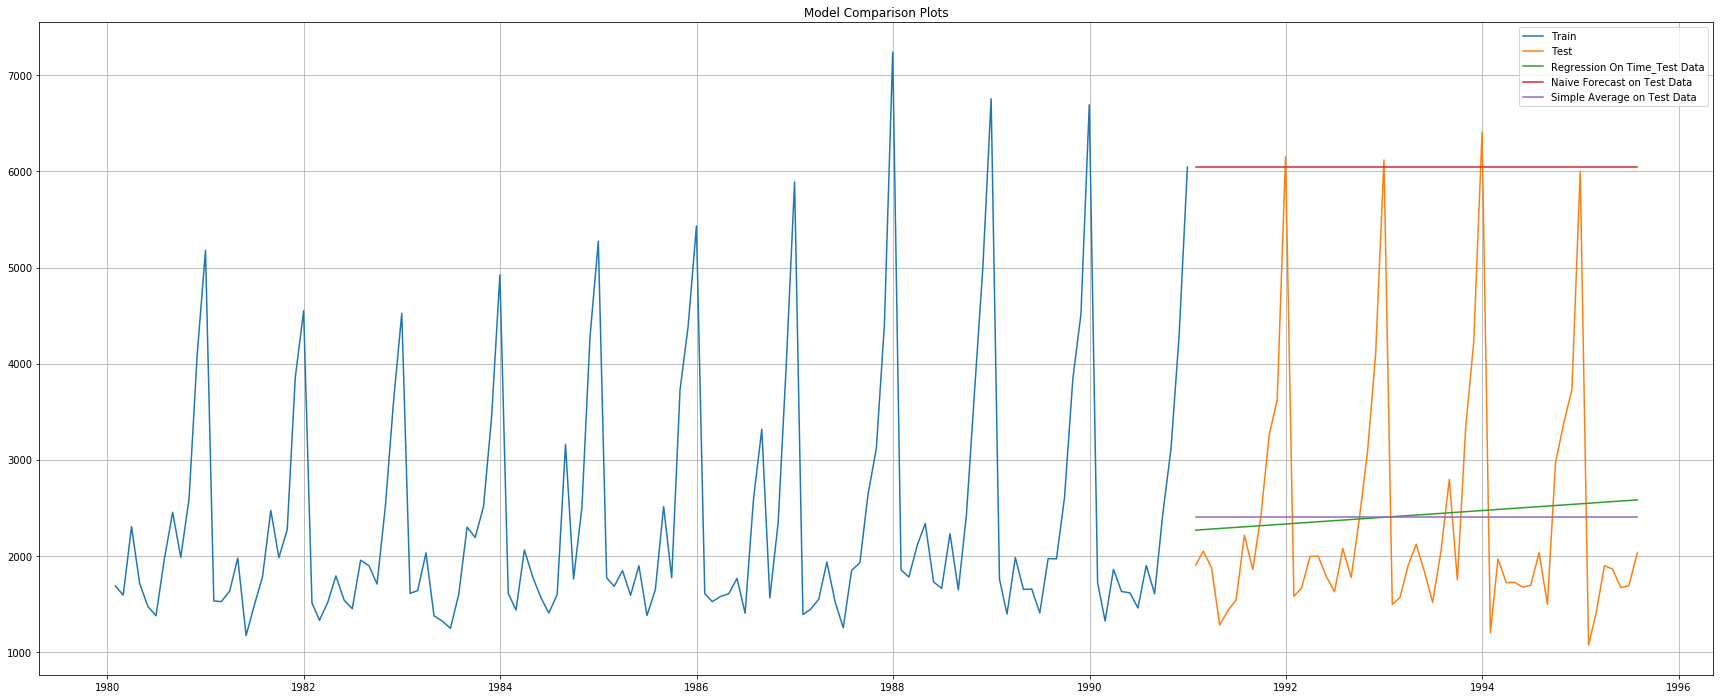

In [60]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

#plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

## Method 5: Simple Exponential Smoothing

In [61]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [62]:
SES_train = train
SES_test = test

In [63]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

C:\Users\Pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [64]:
model_SES_autofit = model_SES.fit(optimized=True)

C:\Users\Pc\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [65]:
model_SES_autofit.params

{'smoothing_level': 0.0,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 2403.785621547663,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [66]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

C:\Users\Pc\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Sparkling,predict
Time_Stamp,,
1991-01-31,1902,2403.785622
1991-02-28,2049,2403.785622
1991-03-31,1874,2403.785622
1991-04-30,1279,2403.785622
1991-05-31,1432,2403.785622


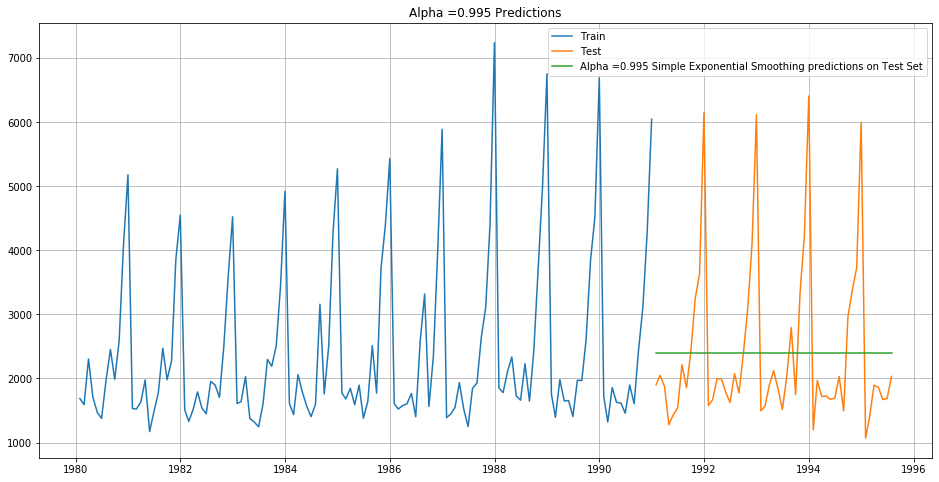

In [67]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

### Model Evaluation for $\alpha$ = 0.995 : Simple Exponential Smoothing

In [68]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1275.082


In [69]:
resultsDf_5 = pd.DataFrame({'RMSE': [rmse_model5_test_1]},index=['Alpha=0.995,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,RMSE
RegressionOnTime,1275.867052
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,805.791364
4pointTrailingMovingAverage,1188.130063
6pointTrailingMovingAverage,1327.374425
9pointTrailingMovingAverage,1466.477260
"Alpha=0.995,SimpleExponentialSmoothing",1275.081823


# Method 7: Triple Exponential Smoothing (Holt - Winter's Model)
## Three parameters α, βand γ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.


In [70]:
TES_train = train.copy()
TES_test = test.copy()

In [71]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')

In [72]:
model_TES_autofit = model_TES.fit()

C:\Users\Pc\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Pc\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [73]:
model_TES_autofit.params

{'smoothing_level': 0.15420626100710186,
 'smoothing_slope': 5.31004588730174e-21,
 'smoothing_seasonal': 0.3713228125445634,
 'damping_slope': nan,
 'initial_level': 1639.99933972618,
 'initial_slope': 4.847695527861546,
 'initial_seasons': array([1.00842978, 0.96899514, 1.24181168, 1.13206716, 0.93979295,
        0.93811177, 1.22457951, 1.54428109, 1.27335495, 1.631977  ,
        2.48292059, 3.11861503]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [74]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,Sparkling,predict,auto_predict
Time_Stamp,,,
1991-01-31,1902,2403.785622,1602.194523
1991-02-28,2049,2403.785622,1373.889119
1991-03-31,1874,2403.785622,1807.439476
1991-04-30,1279,2403.785622,1704.573982
1991-05-31,1432,2403.785622,1602.374672


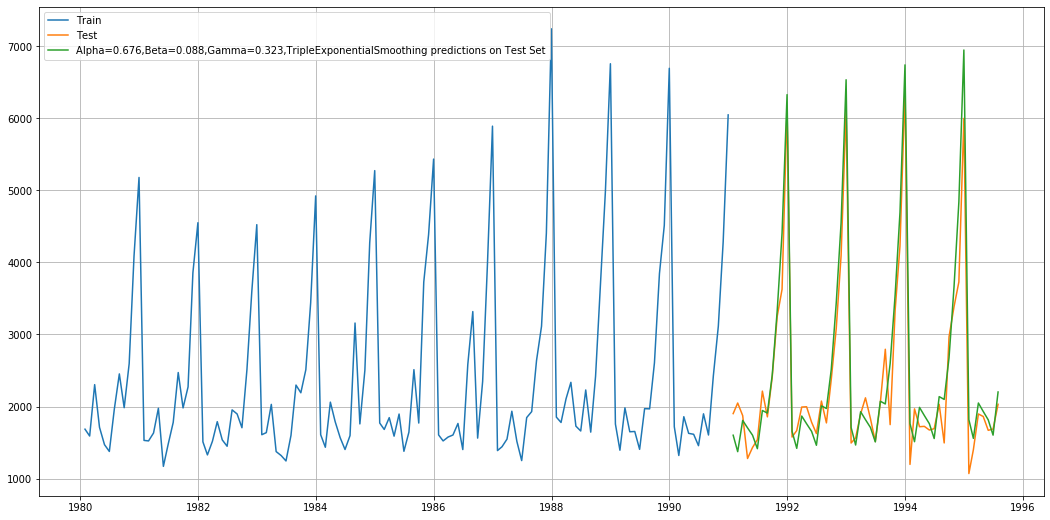

In [75]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [76]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.676,Beta=0.088,Gamma=0.323, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.676,Beta=0.088,Gamma=0.323, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 383.158


In [77]:
resultsDf_8_1 = pd.DataFrame({'RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,RMSE
RegressionOnTime,1275.867052
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,805.791364
4pointTrailingMovingAverage,1188.130063
6pointTrailingMovingAverage,1327.374425
9pointTrailingMovingAverage,1466.477260
"Alpha=0.995,SimpleExponentialSmoothing",1275.081823
"Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",383.157627


## 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05
.

In [78]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

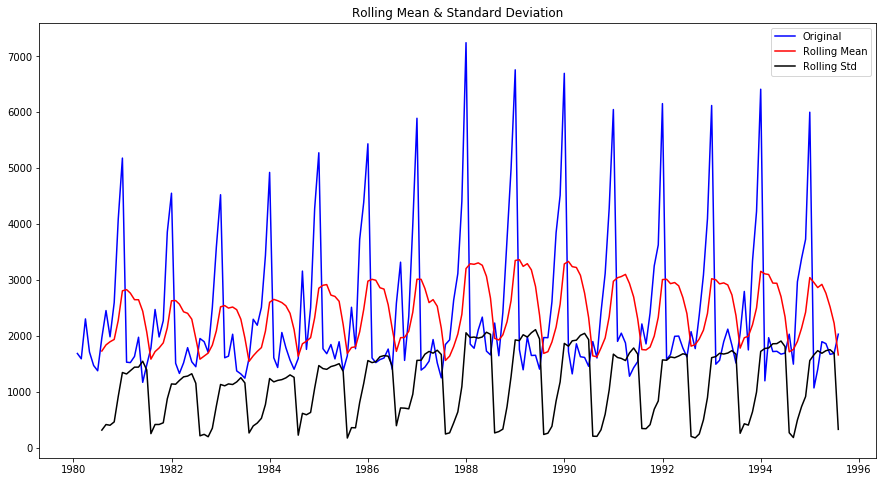

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [79]:
test_stationarity(df['Sparkling'])

**We see that at 5% significant level the Time Series is non-stationary.**

**Let us take a difference of order 1 and check whether the Time Series is stationary or not.**

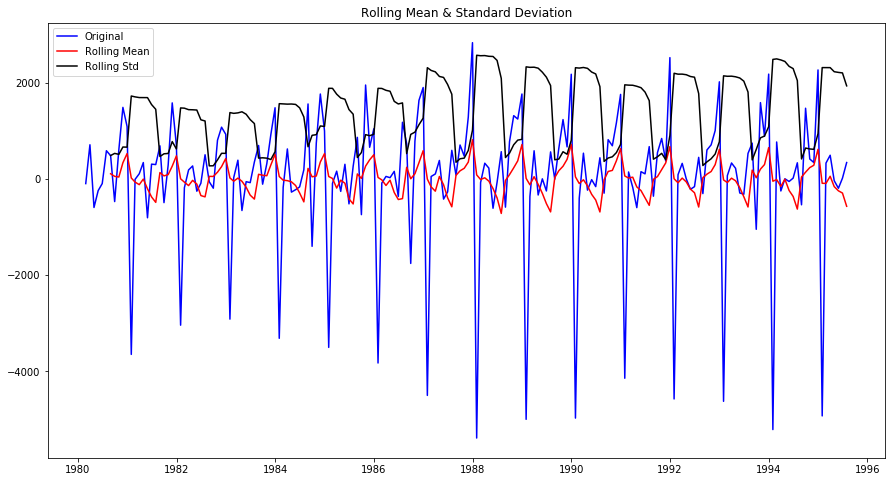

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [80]:
test_stationarity(df['Sparkling'].diff().dropna())

**We see that at 𝛼 = 0.05 the Time Series is indeed stationary.**

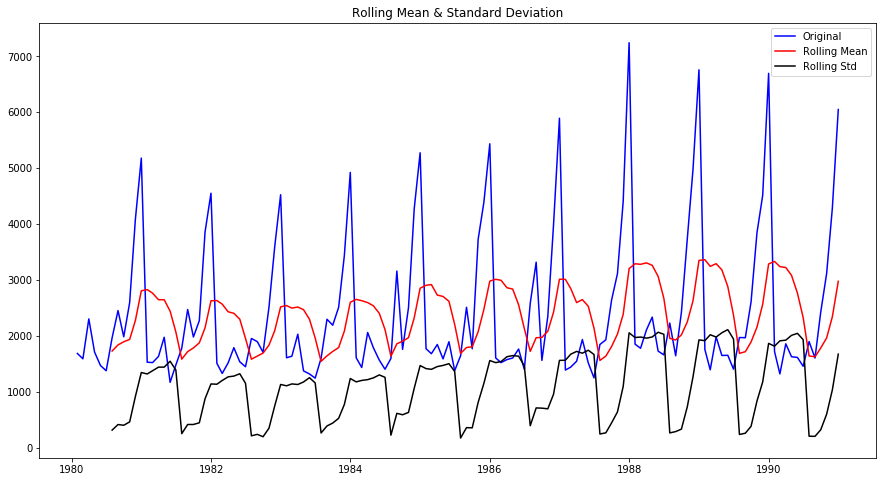

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [81]:
test_stationarity(train['Sparkling'])

**We see that at 5% significant level the Time Series is non-stationary.**

**Let us take a difference of order 1 and check whether the Time Series is stationary or not.**


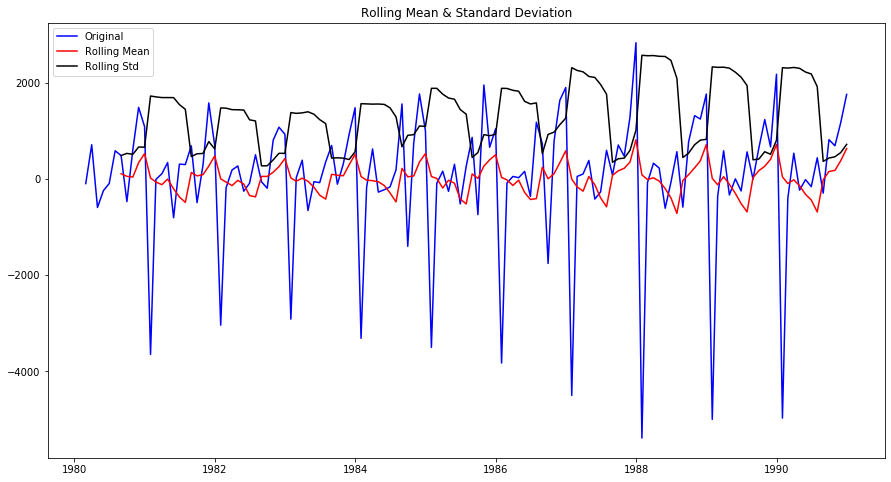

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [82]:
test_stationarity(train['Sparkling'].diff().dropna())

**We see that at 𝛼 = 0.05 the Time Series is indeed stationary.**

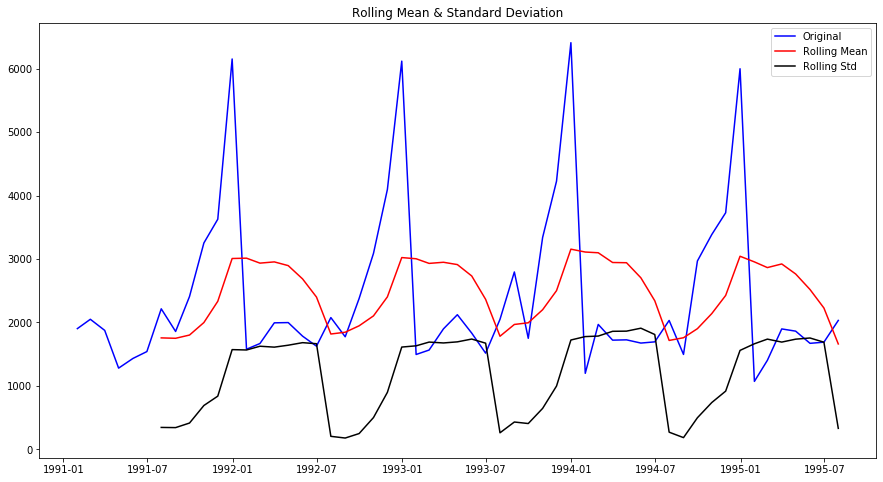

Results of Dickey-Fuller Test:
Test Statistic                 -1.790189
p-value                         0.385343
#Lags Used                     11.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64 



In [83]:
test_stationarity(test['Sparkling'])

**We see that at 5% significant level the Time Series is non-stationary.**

**Let us take a difference of order 1 and check whether the Time Series is stationary or not.**


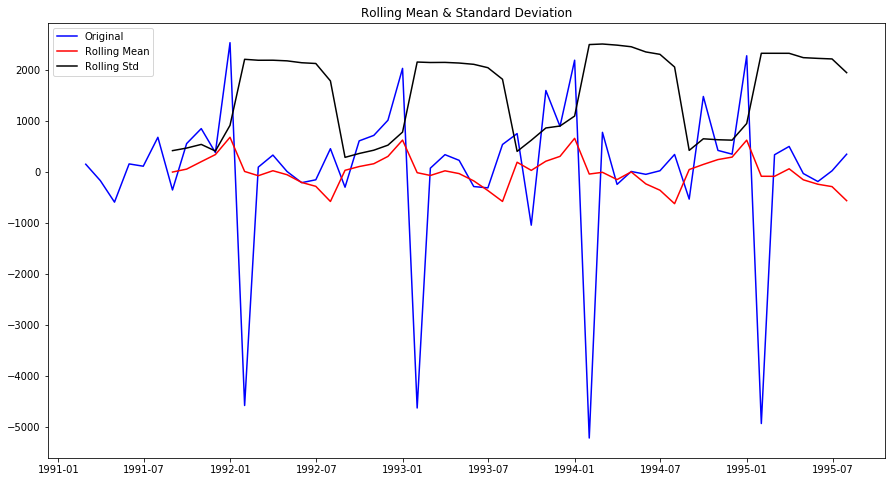

Results of Dickey-Fuller Test:
Test Statistic                -7.050414e+00
p-value                        5.545252e-10
#Lags Used                     1.100000e+01
Number of Observations Used    4.200000e+01
Critical Value (1%)           -3.596636e+00
Critical Value (5%)           -2.933297e+00
Critical Value (10%)          -2.604991e+00
dtype: float64 



In [84]:
test_stationarity(test['Sparkling'].diff().dropna())

**We see that at 𝛼 = 0.05 the Time Series is indeed stationary.**

## 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

## ARIMA

In [85]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [86]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [87]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.906437115225
ARIMA(0, 1, 2) - AIC:2232.7830976841665
ARIMA(1, 1, 0) - AIC:2268.5280605942976
ARIMA(1, 1, 1) - AIC:2235.013945351675
ARIMA(1, 1, 2) - AIC:2233.5976471190743
ARIMA(2, 1, 0) - AIC:2262.0356001096925
ARIMA(2, 1, 1) - AIC:2232.3604898897147
ARIMA(2, 1, 2) - AIC:2210.6176473763135


C:\Users\Pc\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [88]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
8,"(2, 1, 2)",2210.617647
7,"(2, 1, 1)",2232.360490
2,"(0, 1, 2)",2232.783098
5,"(1, 1, 2)",2233.597647
4,"(1, 1, 1)",2235.013945
6,"(2, 1, 0)",2262.035600
1,"(0, 1, 1)",2264.906437
3,"(1, 1, 0)",2268.528061
0,"(0, 1, 0)",2269.582796


In [89]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.309
Method:                       css-mle   S.D. of innovations           1012.410
Date:                Sun, 28 Mar 2021   AIC                           2210.618
Time:                        22:45:17   BIC                           2227.869
Sample:                    02-29-1980   HQIC                          2217.628
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5858      0.516     10.819      0.000       4.574       6.598
ar.L1.D.Sparkling     1.2700      0.074     17.047      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

C:\Users\Pc\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


### Predict on the Test Set using this model and evaluate the model.

In [90]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [91]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

1374.786712941422


In [92]:
resultsDfA = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(2,1,2)'])

resultsDfA

,RMSE
"ARIMA(2,1,2)",1374.786713


### Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [93]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 3) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 3)
Model: (0, 1, 2)(0, 0, 2, 3)
Model: (1, 1, 0)(1, 0, 0, 3)
Model: (1, 1, 1)(1, 0, 1, 3)
Model: (1, 1, 2)(1, 0, 2, 3)
Model: (2, 1, 0)(2, 0, 0, 3)
Model: (2, 1, 1)(2, 0, 1, 3)
Model: (2, 1, 2)(2, 0, 2, 3)


In [94]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [95]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 3) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 3) - AIC:2202.3272473321053
SARIMA(0, 1, 0)x(0, 0, 2, 3) - AIC:2153.154935988181
SARIMA(0, 1, 0)x(1, 0, 0, 3) - AIC:2219.3714563009444
SARIMA(0, 1, 0)x(1, 0, 1, 3) - AIC:2203.622428462263
SARIMA(0, 1, 0)x(1, 0, 2, 3) - AIC:2155.0857300804187
SARIMA(0, 1, 0)x(2, 0, 0, 3) - AIC:2164.958408323006
SARIMA(0, 1, 0)x(2, 0, 1, 3) - AIC:2166.7242452612577
SARIMA(0, 1, 0)x(2, 0, 2, 3) - AIC:2104.065489305731
SARIMA(0, 1, 1)x(0, 0, 0, 3) - AIC:2230.1629078505857
SARIMA(0, 1, 1)x(0, 0, 1, 3) - AIC:2177.117060408457
SARIMA(0, 1, 1)x(0, 0, 2, 3) - AIC:2117.7566848874776
SARIMA(0, 1, 1)x(1, 0, 0, 3) - AIC:2213.2375662542836
SARIMA(0, 1, 1)x(1, 0, 1, 3) - AIC:2169.8087926164712
SARIMA(0, 1, 1)x(1, 0, 2, 3) - AIC:2119.394115329779
SARIMA(0, 1, 1)x(2, 0, 0, 3) - AIC:2132.6061444543516
SARIMA(0, 1, 1)x(2, 0, 1, 3) - AIC:2130.409923870959
SARIMA(0, 1, 1)x(2, 0, 2, 3) - AIC:2003.1359197759648
SARIMA(0, 1, 2)x(0, 0, 0, 3) - AIC:

In [96]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
80,"(2, 1, 2)","(2, 0, 2, 3)",1958.569503
26,"(0, 1, 2)","(2, 0, 2, 3)",1986.989363
53,"(1, 1, 2)","(2, 0, 2, 3)",1988.487817
71,"(2, 1, 1)","(2, 0, 2, 3)",1995.658249
17,"(0, 1, 1)","(2, 0, 2, 3)",2003.135920


In [97]:
import statsmodels.api as sm

auto_SARIMA_3 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(2, 1, 2),
                                seasonal_order=(2, 0, 2, 3),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_3 = auto_SARIMA_3.fit(maxiter=1000)
print(results_auto_SARIMA_3.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 0, 2, 3)   Log Likelihood                -970.285
Date:                           Sun, 28 Mar 2021   AIC                           1958.570
Time:                                   22:45:42   BIC                           1983.806
Sample:                                        0   HQIC                          1968.820
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6886      0.093      7.430      0.000       0.507       0.870
ar.L2         -0.5369      0.089     -6.036

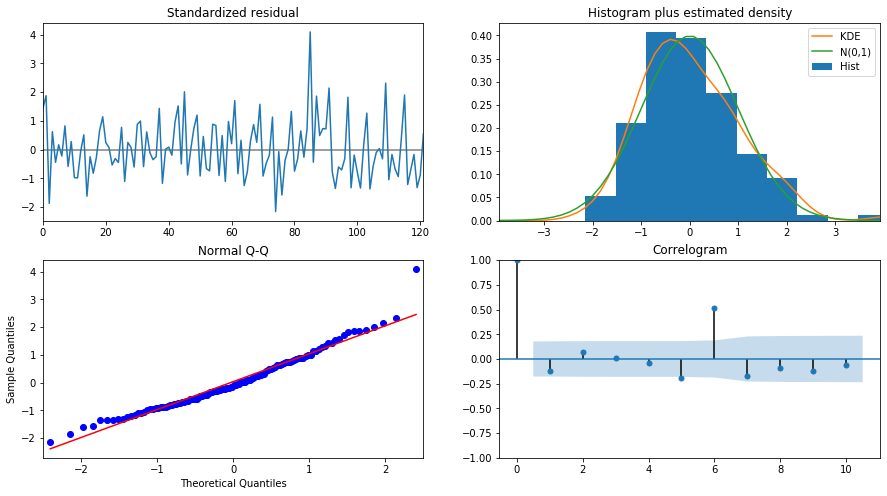

In [98]:
results_auto_SARIMA_3.plot_diagnostics()
plt.show()

**From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots.**

## Predict on the Test Set using this model and evaluate the model.

In [99]:
predicted_auto_SARIMA_3 = results_auto_SARIMA_3.get_forecast(steps=len(test))

In [100]:
predicted_auto_SARIMA_3.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,2619.661504,652.680353,1340.431519,3898.891488
1,1878.857095,653.977693,597.084370,3160.629819
2,1953.669144,706.756051,568.452739,3338.885549
3,1497.433808,728.753441,69.103310,2925.764306
4,686.767148,734.222829,-752.283153,2125.817449


In [101]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_3.predicted_mean,squared=False)
print(rmse)

1009.8950176341717


In [102]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(2,1,2)(2,0,2,3)'])


resultsDfA = pd.concat([resultsDfA,temp_resultsDf])

resultsDfA

,RMSE
"ARIMA(2,1,2)",1374.786713
"SARIMA(2,1,2)(2,0,2,3)",1009.895018


## Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

**Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.**


In [103]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

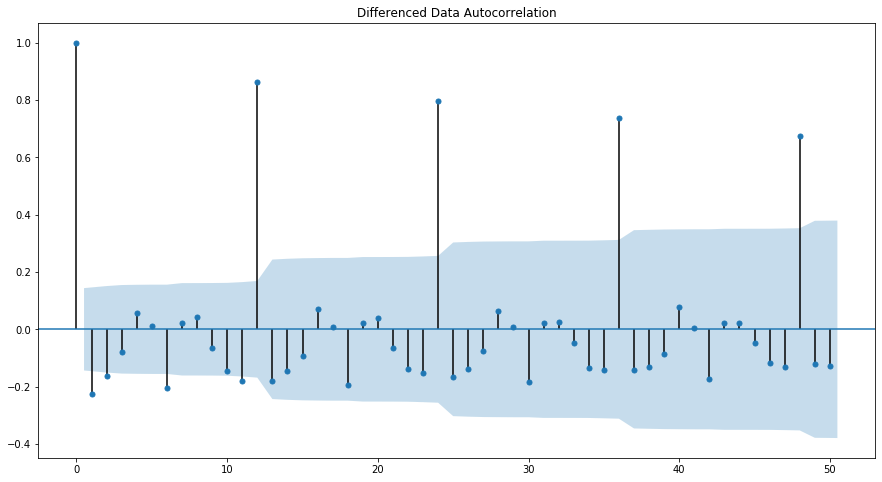

In [104]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

**We see that there can be a seasonality of 6 , 12 as well as 24. We will run our auto SARIMA models by setting seasonality both as 6 ,12 and 24.**

## Setting the seasonality as 6 for the first iteration of the auto SARIMA model.

In [105]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [106]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [107]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:2152.3780761716293
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1955.6355536890567
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2164.4097581959904
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:2079.5599844434373
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1926.9360123573417
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1839.4012986872267
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1841.199361751041


C:\Users\Pc\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1810.9177805659735
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2230.1629078505857
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:2130.565285908282
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1918.1876339545634
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:2139.5732428781894
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:2006.5174298132763
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1855.709327681411
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1798.7885103999192
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1800.7717933170532
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1741.6473511385432
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AIC:2187.441010168715
SARIMA(0, 1, 2)x(0, 0, 1, 6) - AIC:2087.6843840215965
SARIMA(0, 1, 2)x(0, 0, 2, 6) - AIC:1886.1151454922765
SARIMA(0, 1, 2)x(1, 0, 0, 6) - AIC:2129.7395689234595
SARIMA(0, 1, 2)x(1, 0, 1, 6) - AIC:1988.4111271540373
SARIMA(0, 1, 2)x(1, 0, 2, 6) - AIC:1839.693809125757
SARIMA(0, 1, 2)x(2, 0, 0, 6) - AIC:1791.6537079050413
SARIMA(0, 1, 2)x(2, 0, 1, 6) - AIC:1793.619101075748
SARIMA(0, 1, 2)x(2, 0, 2, 6) - AI

In [108]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
53,"(1, 1, 2)","(2, 0, 2, 6)",1727.670865
26,"(0, 1, 2)","(2, 0, 2, 6)",1727.888827
80,"(2, 1, 2)","(2, 0, 2, 6)",1729.192580
17,"(0, 1, 1)","(2, 0, 2, 6)",1741.647351
44,"(1, 1, 1)","(2, 0, 2, 6)",1743.379778


In [109]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -855.835
Date:                           Sun, 28 Mar 2021   AIC                           1727.671
Time:                                   22:46:29   BIC                           1749.700
Sample:                                        0   HQIC                          1736.613
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6452      0.286     -2.256      0.024      -1.206      -0.085
ma.L1         -0.3355      0.227     -1.475

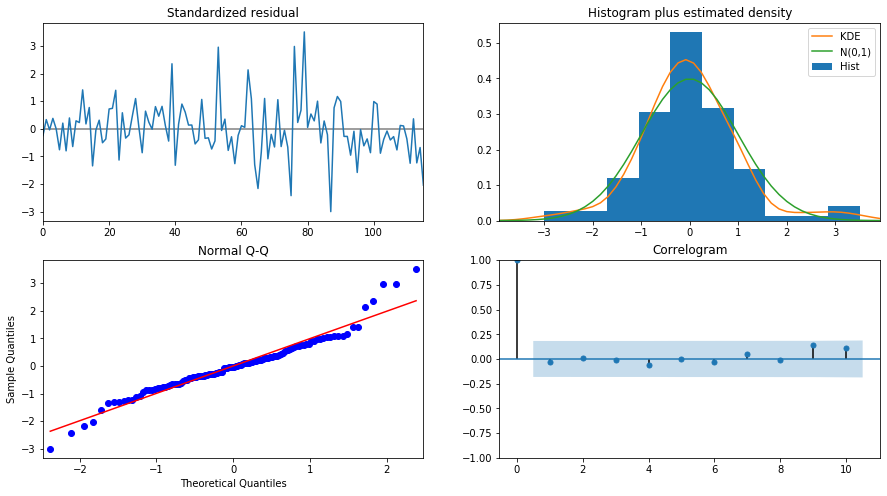

In [110]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

**From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots.**

## Predict on the Test Set using this model and evaluate the model.

In [111]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [112]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1330.320605,380.566778,584.423426,2076.217785
1,1177.251086,392.114335,408.721111,1945.781061
2,1625.801749,392.309331,856.889590,2394.713909
3,1546.337003,397.713656,766.832562,2325.841444
4,1308.651221,398.933669,526.755598,2090.546845


In [113]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

626.9310776520841


In [114]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(2,0,2,6)'])


resultsDfA = pd.concat([resultsDfA,temp_resultsDf])

resultsDfA

,RMSE
"ARIMA(2,1,2)",1374.786713
"SARIMA(2,1,2)(2,0,2,3)",1009.895018
"SARIMA(1,1,2)(2,0,2,6)",626.931078


**We see that we have huge gain the RMSE value by including the seasonal parameters as well.**

## Setting the seasonality as 12 for the second iteration of the auto SARIMA model

In [115]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [116]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [117]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616845638
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640231578
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456677
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301389376
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.210873579185
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.205415861309
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920813
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.1629078505857
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566387
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089573324765
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881838439
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0903193773431
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1319652505206
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954177505
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245095300011
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018824236462
SARIMA(0, 1,

In [118]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
50,"(1, 1, 2)","(1, 0, 2, 12)",1555.584247
53,"(1, 1, 2)","(2, 0, 2, 12)",1555.934576
26,"(0, 1, 2)","(2, 0, 2, 12)",1557.121563
23,"(0, 1, 2)","(1, 0, 2, 12)",1557.160507
77,"(2, 1, 2)","(1, 0, 2, 12)",1557.340403


In [119]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Sun, 28 Mar 2021   AIC                           1555.584
Time:                                    22:48:03   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6281      0.255     -2.463      0.014      -1.128      -0.128
ma.L1         -0.1041      0.225   

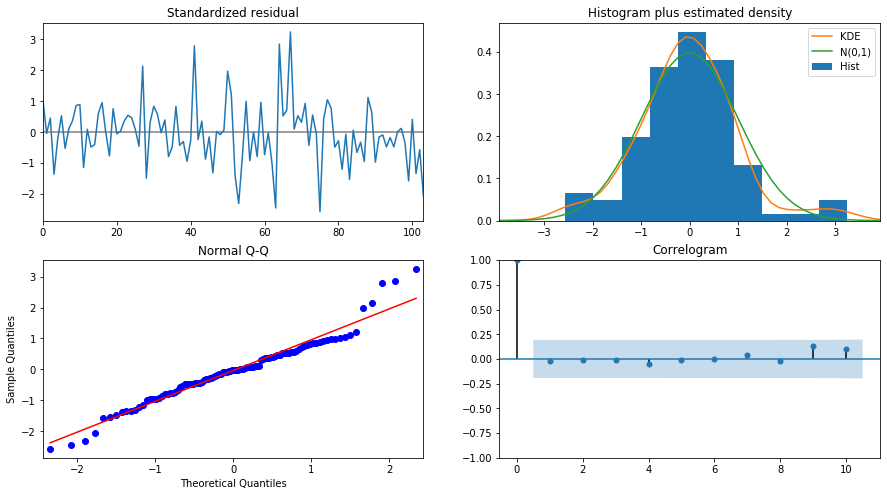

In [120]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

**Similar to the last iteration of the model where the seasonality parameter was taken as 6, here also we see that the model diagnostics plot does not indicate any remaining information that we can get.**

## Predict on the Test Set using this model and evaluate the model.

In [121]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [122]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1327.415726,388.344857,566.273793,2088.557659
1,1315.137174,402.007503,527.216947,2103.057402
2,1621.624171,402.001104,833.716484,2409.531857
3,1598.892411,407.238024,800.720551,2397.064270
4,1392.720926,407.967980,593.118379,2192.323473


In [123]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

528.5890827435495


In [124]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(1,0,2,12)'])


resultsDfA = pd.concat([resultsDfA,temp_resultsDf])

resultsDfA

,RMSE
"ARIMA(2,1,2)",1374.786713
"SARIMA(2,1,2)(2,0,2,3)",1009.895018
"SARIMA(1,1,2)(2,0,2,6)",626.931078
"SARIMA(1,1,2)(1,0,2,12)",528.589083


**We see that the RMSE value have reduced further when the seasonality parameter was changed to 12.**

## 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

### Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

In [125]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\Pc\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


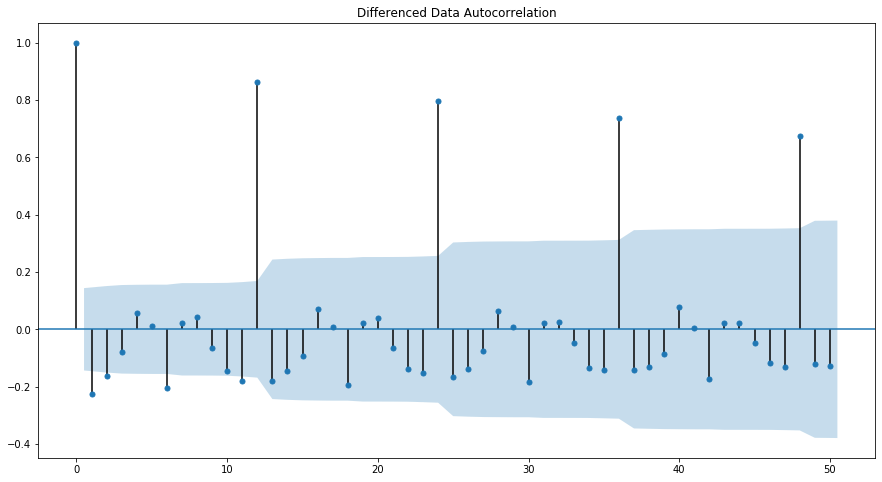

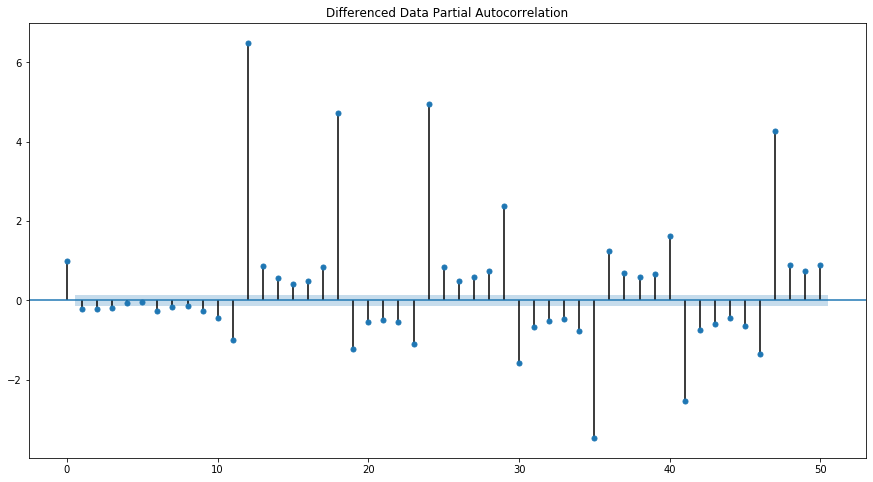

In [126]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

Here, we have taken alpha=0.05.

    The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 0.
    The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 0.

By looking at the above plots, we can say that both the PACF and ACF plot cuts-off at lag 0.


In [127]:
manual_ARIMA = ARIMA(train['Sparkling'].astype('float64'), order=(0,1,0),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1132.791
Method:                           css   S.D. of innovations           1377.911
Date:                Sun, 28 Mar 2021   AIC                           2269.583
Time:                        22:48:05   BIC                           2275.333
Sample:                    02-29-1980   HQIC                          2271.919
                         - 12-31-1990                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2901    120.389      0.277      0.782    -202.667     269.248


**We get a comparatively simpler model by looking at the ACF and the PACF plots.**


Note: When we see that both the AR(p) and the MA(q) model are of order 0, we have to convert the input variable into a 'float64' type variable else Python might throw an error.

## Predict on the Test Set using this model and evaluate the model.

In [128]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [129]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

4779.15429919654


In [130]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(0,1,0)'])


resultsDfA = pd.concat([resultsDfA,temp_resultsDf])

resultsDfA

,RMSE
"ARIMA(2,1,2)",1374.786713
"SARIMA(2,1,2)(2,0,2,3)",1009.895018
"SARIMA(1,1,2)(2,0,2,6)",626.931078
"SARIMA(1,1,2)(1,0,2,12)",528.589083
"ARIMA(0,1,0)",4779.154299


## Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 6.

Let us look at the ACF and the PACF plots once more.


C:\Users\Pc\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


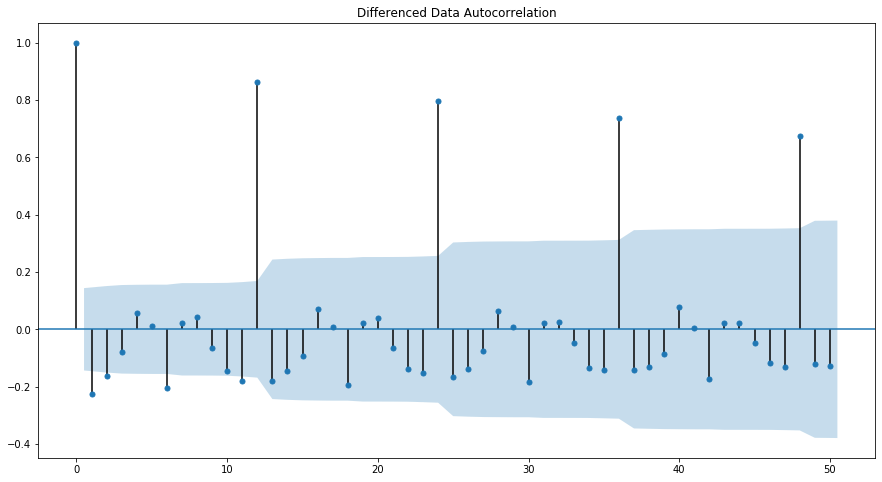

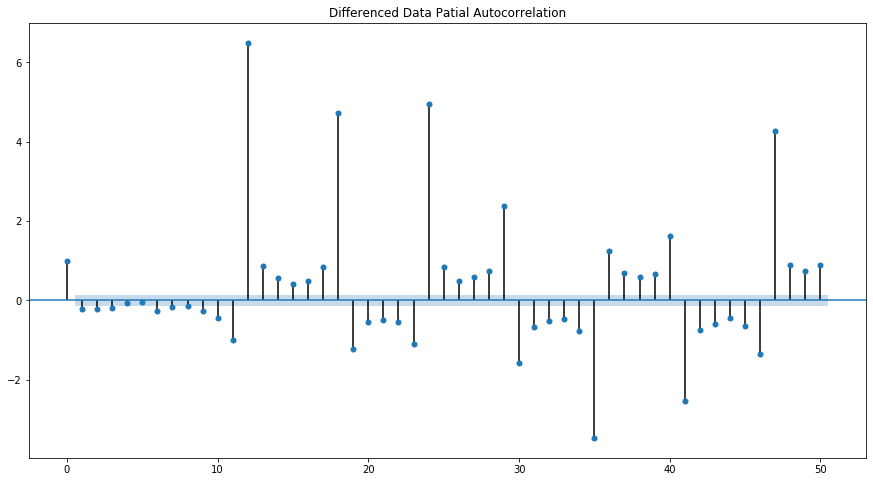

In [131]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

**We see that our ACF plot at the seasonal interval (6) does not taper off. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.**


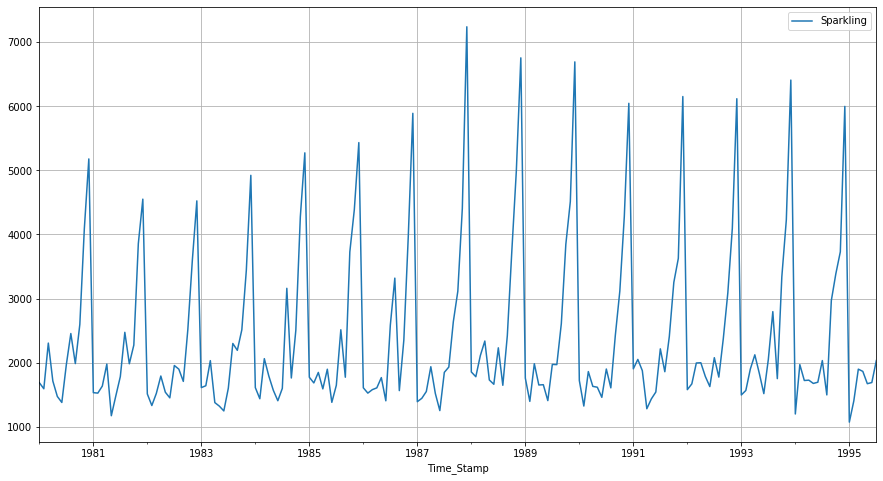

In [132]:
df.plot()
plt.grid();

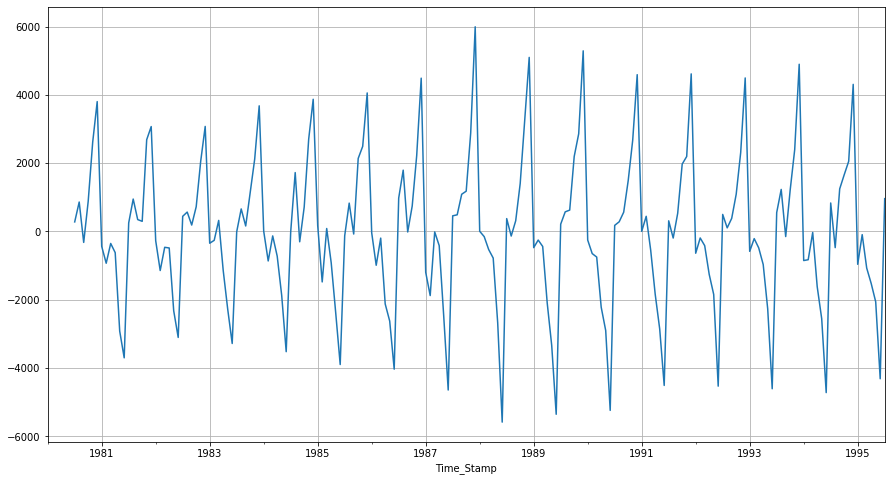

In [133]:
(df['Sparkling'].diff(6)).plot()
plt.grid();

**We see that there might be a slight trend which can be noticed in the data. So we take a differencing of first order on the seasonally differenced series.**

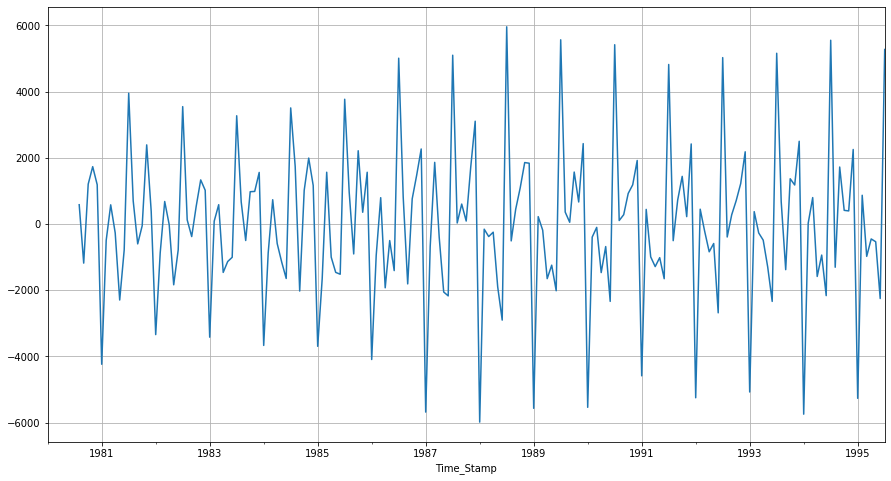

In [134]:
(df['Sparkling'].diff(6)).diff().plot()
plt.grid();

Now we see that there is almost no trend present in the data. Seasonality is only present in the data.

Let us go ahead and check the stationarity of the above series before fitting the SARIMA model

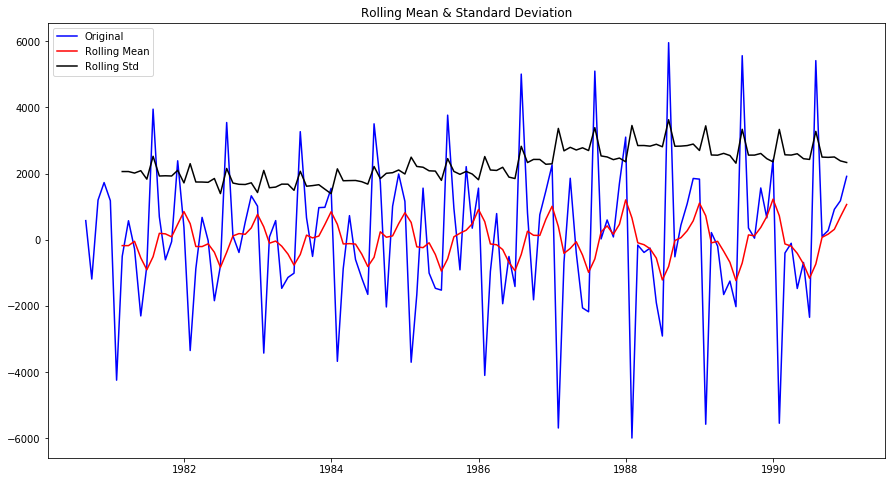

Results of Dickey-Fuller Test:
Test Statistic                -7.017242e+00
p-value                        6.683657e-10
#Lags Used                     1.300000e+01
Number of Observations Used    1.110000e+02
Critical Value (1%)           -3.490683e+00
Critical Value (5%)           -2.887952e+00
Critical Value (10%)          -2.580857e+00
dtype: float64 



In [135]:
test_stationarity((train['Sparkling'].diff(6).dropna()).diff(1).dropna())

Checking the ACF and the PACF plots for the new modified Time Series.

C:\Users\Pc\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


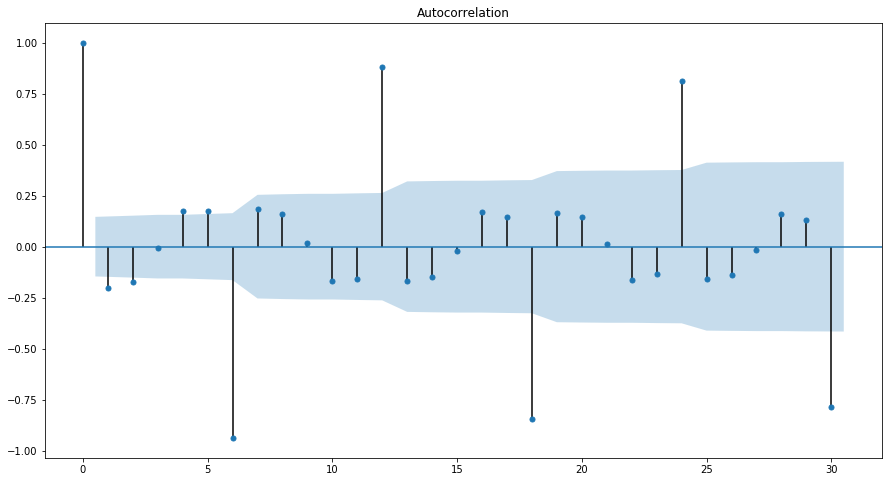

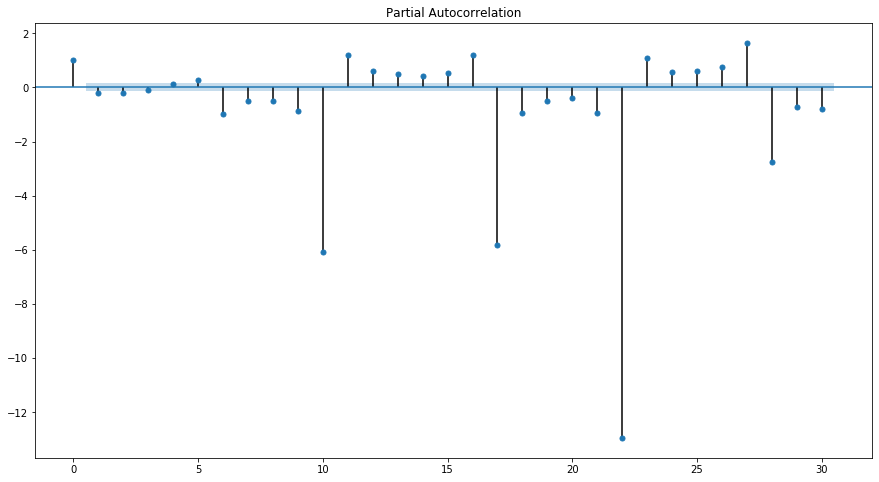

In [136]:
plot_acf((df['Sparkling'].diff(6).dropna()).diff(1).dropna(),lags=30)
plot_pacf((df['Sparkling'].diff(6).dropna()).diff(1).dropna(),lags=30);

Here, we have taken alpha=0.05.

In [137]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(0, 1, 0),
                                seasonal_order=(1, 1, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                         SARIMAX Results                                         
Dep. Variable:                                         y   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(1, 1, [1, 2, 3], 6)   Log Likelihood                -811.726
Date:                                   Sun, 28 Mar 2021   AIC                           1633.452
Time:                                           22:48:09   BIC                           1646.770
Sample:                                                0   HQIC                          1638.850
                                                   - 132                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L6       -1.0176      0.015    -68.688      0.000    

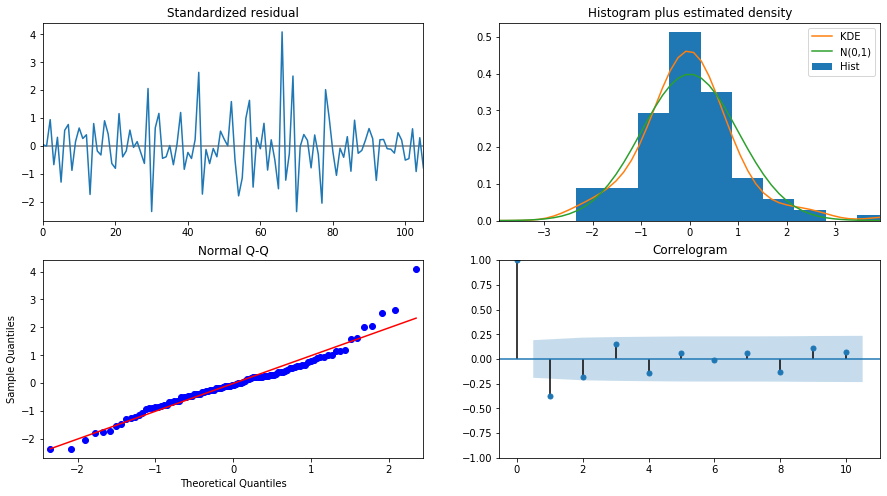

In [138]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [139]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [140]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,907.290555,510.717722,-93.697786,1908.278897
1,529.940136,722.263216,-885.669755,1945.550028
2,1125.415696,884.587879,-608.344688,2859.176080
3,933.703720,1021.433932,-1068.270000,2935.677439
4,743.496496,1141.997741,-1494.777947,2981.770938


In [141]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

1914.9600286075897


In [142]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(0,1,0)(1,1,3,6)'])


resultsDfA = pd.concat([resultsDfA,temp_resultsDf])

resultsDfA

,RMSE
"ARIMA(2,1,2)",1374.786713
"SARIMA(2,1,2)(2,0,2,3)",1009.895018
"SARIMA(1,1,2)(2,0,2,6)",626.931078
"SARIMA(1,1,2)(1,0,2,12)",528.589083
"ARIMA(0,1,0)",4779.154299
"SARIMA(0,1,0)(1,1,3,6)",1914.960029


## 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [143]:
resultsDf = pd.concat([resultsDfA,resultsDf])

resultsDf

,RMSE
"ARIMA(2,1,2)",1374.786713
"SARIMA(2,1,2)(2,0,2,3)",1009.895018
"SARIMA(1,1,2)(2,0,2,6)",626.931078
"SARIMA(1,1,2)(1,0,2,12)",528.589083
"ARIMA(0,1,0)",4779.154299
"SARIMA(0,1,0)(1,1,3,6)",1914.960029
RegressionOnTime,1275.867052
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,805.791364


## 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

## Building the most optimum model on the Full Data.

**Based on the RMSE value the Triple Exponential Smoothing has a better Value but For this value we are choosing Sarima with parameter (1,1,2)(1,0,2,12) as it offers better seasonality and trend.**

In [144]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order=(1,1,2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\Pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\Pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood               -1173.413
Date:                            Sun, 28 Mar 2021   AIC                           2360.826
Time:                                    22:48:13   BIC                           2382.308
Sample:                                01-31-1980   HQIC                          2369.549
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6611      0.242     -2.735      0.006      -1.135      -0.187
ma.L1         -0.1801      0.219   

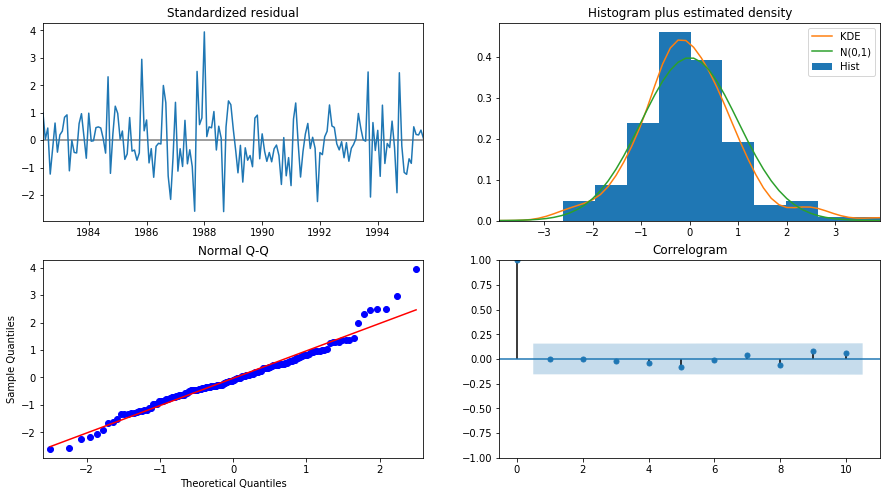

In [145]:
results_full_data_model.plot_diagnostics();

## Evaluate the model on the whole and predict 12 months into the future (till the end of next year).

In [146]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=12)

In [147]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-31,1836.344693,379.703250,1092.139998,2580.549387
1995-09-30,2489.634515,384.464459,1736.098023,3243.171007
1995-10-31,3324.595570,384.570113,2570.851999,4078.339140
1995-11-30,4020.300372,386.328240,3263.110936,4777.489808
1995-12-31,6290.048928,386.382753,5532.752647,7047.345209


In [148]:
rmse = mean_squared_error(df['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 539.9267770894326


In [149]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-07-31', freq='M'))

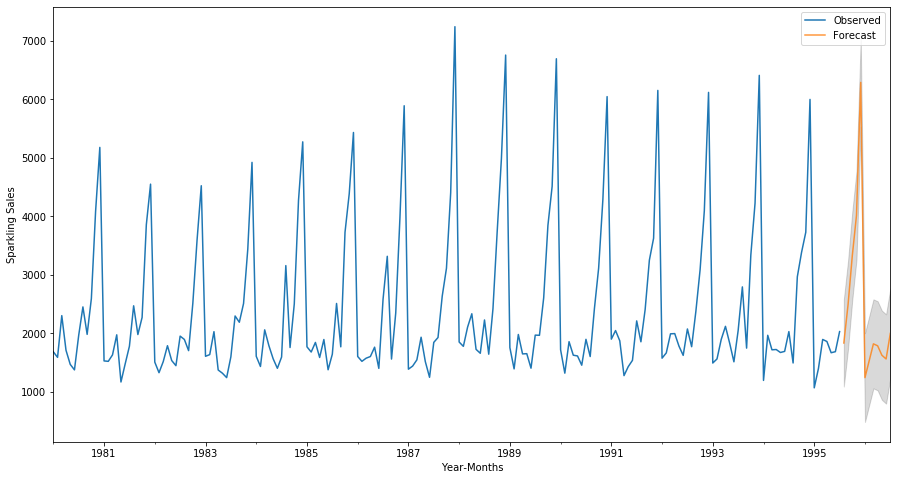

In [150]:
# plot the forecast along with the confidence band

axis = df['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=.8)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=0.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling Sales')
plt.legend(loc='best')
plt.show()

## 10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

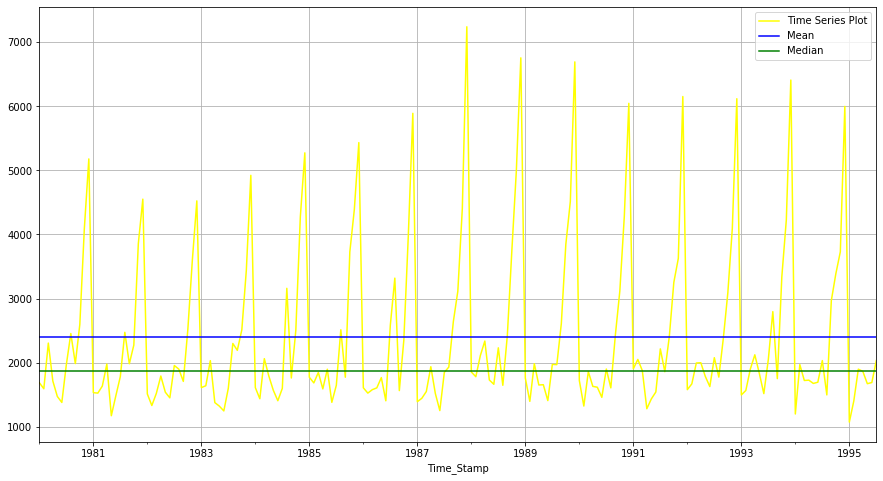

In [152]:
df.plot(color='Yellow')
plt.axhline(df['Sparkling'].mean(),color='Blue')
plt.axhline(df['Sparkling'].median(),color='Green')
plt.grid()
plt.legend(['Time Series Plot','Mean','Median']);

**1.This graph shows the mean of over all Sales of the sparkling wine is about 2400 units from 1980 to 1995 while maximum sales of about 7242 unit in the year 1988.**

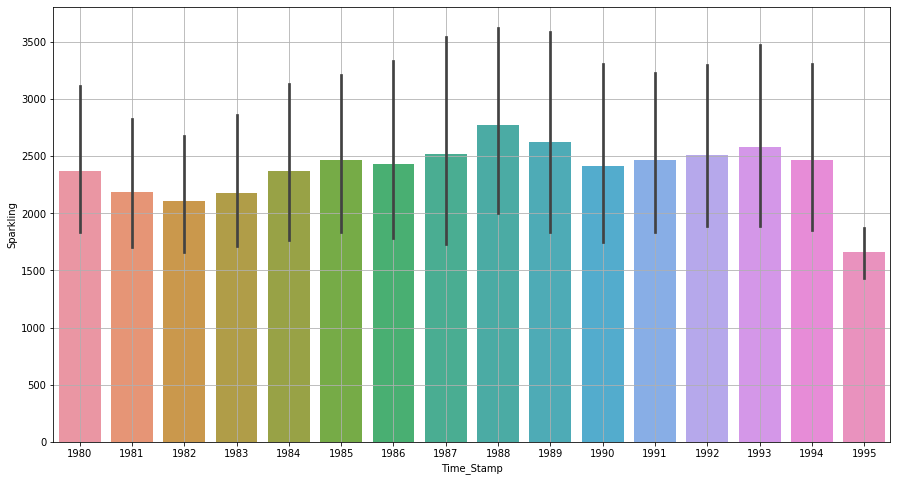

In [153]:
sns.barplot(x = df.index.year,y = df['Sparkling'])
plt.grid();

**2. From the dataset we can interpret sales of wine has been constant and similar across the years with highest sale on 1988 and lowest in 1995.So it is recommended to do more marketing to boost the Sparkling wine sale.**

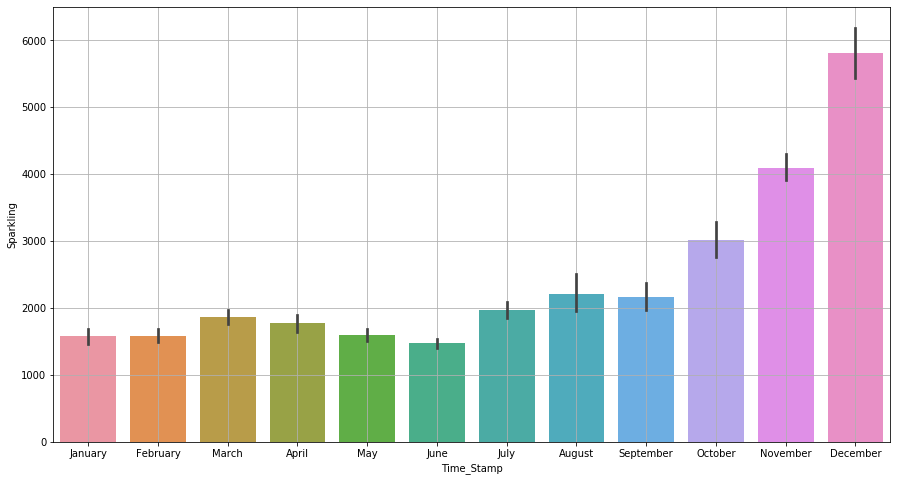

In [154]:
sns.barplot(x = df.index.month_name(),y = df['Sparkling'])
plt.grid();

**3.Sales of Rose wine have always been high during the months of December So we can interpret that customers prefer this wine during Holidays such as Christmas , New-year etc.**

**4.Also we can see a rise in sale during last Quarter of the year (i.e September, October, November and December).**

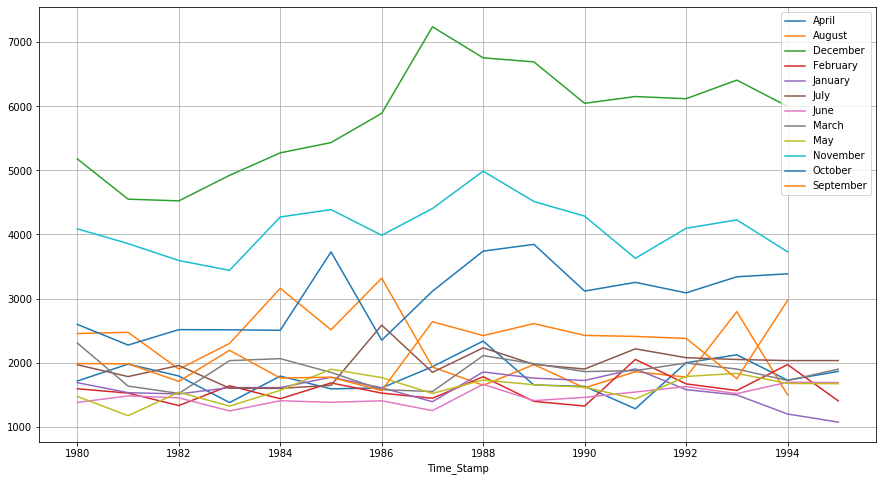

In [155]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

**5. SARIMA model(1,1,2)(1,0,2,12) is used for prediction for next 12 months. In the frst quarter sales will achieve highest volume & in second quarter Volume will dramatically fall .**


**6.In 3 & 4 quarter Volume will be marginal increased to sales volume up to 1500.**


**7. From the forecast for the next 12 months it is predicted that the sale of the sparkling wine will increase than the previous year (1995) and also predicted the sale will be between 1989 and 1994.**